In [4]:
#writing some conda package or module
#!pip install netCDF4
%matplotlib inline
import warnings
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
#!pip install cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

In [5]:
data = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/observation/trm/MonthlyTRMM_3B43/3B43.1998_2008.nc')
 

data

<xarray.Dataset>
Dimensions:  (time: 132, lat: 400, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 1998-01-01 1998-02-01 ... 2008-12-01
  * lat      (lat) float32 -49.88 -49.62 -49.38 -49.12 ... 49.38 49.62 49.88
  * lon      (lon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
Data variables:
    date     (time) int32 ...
    datesec  (time) timedelta64[ns] ...
    precip   (time, lat, lon) float32 ...
Attributes:
    creation_date:             Thu Nov  5 16:19:03 CET 2009
    Conventions:               None
    source_html:               \nhttp://disc.sci.gsfc.nasa.gov/data/datapool/...
    title:                     TRMM: 3B43
    history:                   Thu Nov  5 16:26:10 2009: ncrcat 3B43.1998.nc ...
    nco_openmp_thread_number:  1

In [6]:
#to select the year from 1980 to 2015
data = data.sel(time=slice('1981-01-16T12:00:00.000000000','2015-12-16T00:00:00.000000000'))
data

<xarray.Dataset>
Dimensions:  (time: 132, lat: 400, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 1998-01-01 1998-02-01 ... 2008-12-01
  * lat      (lat) float32 -49.88 -49.62 -49.38 -49.12 ... 49.38 49.62 49.88
  * lon      (lon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
Data variables:
    date     (time) int32 19980101 19980201 19980301 ... 20081101 20081201
    datesec  (time) timedelta64[ns] 1 days 1 days 1 days ... 1 days 1 days
    precip   (time, lat, lon) float32 ...
Attributes:
    creation_date:             Thu Nov  5 16:19:03 CET 2009
    Conventions:               None
    source_html:               \nhttp://disc.sci.gsfc.nasa.gov/data/datapool/...
    title:                     TRMM: 3B43
    history:                   Thu Nov  5 16:26:10 2009: ncrcat 3B43.1998.nc ...
    nco_openmp_thread_number:  1

In [7]:
#for i in data.latitude.values:
 #   print(i)

In [8]:
#for i in data.longitude.values:
 #   print(i)

In [9]:
#to select the x and y coordinates
data = data.sel(lon=slice(86,94),lat=slice(18,28))
data

<xarray.Dataset>
Dimensions:  (time: 132, lat: 40, lon: 32)
Coordinates:
  * time     (time) datetime64[ns] 1998-01-01 1998-02-01 ... 2008-12-01
  * lat      (lat) float32 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88
  * lon      (lon) float32 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
Data variables:
    date     (time) int32 19980101 19980201 19980301 ... 20081101 20081201
    datesec  (time) timedelta64[ns] 1 days 1 days 1 days ... 1 days 1 days
    precip   (time, lat, lon) float32 ...
Attributes:
    creation_date:             Thu Nov  5 16:19:03 CET 2009
    Conventions:               None
    source_html:               \nhttp://disc.sci.gsfc.nasa.gov/data/datapool/...
    title:                     TRMM: 3B43
    history:                   Thu Nov  5 16:26:10 2009: ncrcat 3B43.1998.nc ...
    nco_openmp_thread_number:  1

In [10]:
#interpolating to low resolution 
#new_lon=np.arange(86,94,0.5625)
#new_lat=np.arange(17,28,.556914)
#jjas_data = jjas_data.interp(longitude=new_lon,latitude=new_lat)
#jjas_data

In [11]:
#getting the mean for JJAS data
data_mean = data.precip.mean('time')
 
data_mean

<xarray.DataArray 'precip' (lat: 40, lon: 32)>
array([[0.18204501, 0.17989348, 0.18278594, ..., 0.36554685, 0.35288218,
        0.25938588],
       [0.1795654 , 0.18404073, 0.18652156, ..., 0.33420184, 0.33969536,
        0.26685908],
       [0.17987522, 0.18604836, 0.19207878, ..., 0.3089237 , 0.25276253,
        0.2552258 ],
       ...,
       [0.12586464, 0.1191561 , 0.11421067, ..., 0.16308498, 0.1683504 ,
        0.18998685],
       [0.12961452, 0.11912241, 0.10640071, ..., 0.15158786, 0.15219954,
        0.16319409],
       [0.11771316, 0.10536724, 0.0892969 , ..., 0.1503942 , 0.15795287,
        0.15637131]], dtype=float32)
Coordinates:
  * lat      (lat) float32 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88
  * lon      (lon) float32 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88

In [12]:
#changing unit from mm/month to mm/day
trmm = data_mean*24


trmm

In [14]:
#opening eraint data

data = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/regcm driven by gcm/Era_intrim/eraint_197901-201711.nc')

data

<xarray.Dataset>
Dimensions:    (time: 467, bnds: 2, y: 337, x: 429)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-16T12:00:00 ... 2017-11-16
    lon        (y, x) float64 ...
    lat        (y, x) float64 ...
  * x          (x) float64 -5.35e+06 -5.325e+06 -5.3e+06 ... 5.325e+06 5.35e+06
  * y          (y) float64 -4.2e+06 -4.175e+06 -4.15e+06 ... 4.175e+06 4.2e+06
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    crs        |S1 ...
    pr         (time, y, x) float32 ...
Attributes: (12/165)
    CDI:                                             Climate Data Interface v...
    Conventions:                                     CF-1.7
    history:                                         Wed Jun 29 14:46:35 2022...
    source:                                          RegCM Model output file
    institution:                                     International Centre for...
    project_id:                                      CORDEX
    ...                                              ...
    experiment_id:                                   evaluation
    driving_experiment:                              ECMWF-ERAINT, evaluation...
    driving_model_id:                                ECMWF-ERAINT
    driving_experiment_name:                         evaluation
    model_id:                                        ICTP-RegCM4-7
    CDO:                                             Climate Data Operators v...

In [15]:
#to select the year from 1980 to 2015
data = data.sel(time=slice('1981-01-16T12:00:00.000000000','2015-12-16T00:00:00.000000000'))
data

<xarray.Dataset>
Dimensions:    (time: 419, bnds: 2, y: 337, x: 429)
Coordinates:
  * time       (time) datetime64[ns] 1981-01-16T12:00:00 ... 2015-11-16
    lon        (y, x) float64 ...
    lat        (y, x) float64 ...
  * x          (x) float64 -5.35e+06 -5.325e+06 -5.3e+06 ... 5.325e+06 5.35e+06
  * y          (y) float64 -4.2e+06 -4.175e+06 -4.15e+06 ... 4.175e+06 4.2e+06
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 1981-01-01 1981-02-01 ... 2015-12-01
    crs        |S1 b''
    pr         (time, y, x) float32 ...
Attributes: (12/165)
    CDI:                                             Climate Data Interface v...
    Conventions:                                     CF-1.7
    history:                                         Wed Jun 29 14:46:35 2022...
    source:                                          RegCM Model output file
    institution:                                     International Centre for...
    project_id:                                      CORDEX
    ...                                              ...
    experiment_id:                                   evaluation
    driving_experiment:                              ECMWF-ERAINT, evaluation...
    driving_model_id:                                ECMWF-ERAINT
    driving_experiment_name:                         evaluation
    model_id:                                        ICTP-RegCM4-7
    CDO:                                             Climate Data Operators v...

In [15]:
#jjas_data.x.values
#jjas_data.y.values


In [16]:
#to select the x and y coordinates
data = data.sel(x=slice(1000000.,5275000.),y=slice(2000000.,4175000.))
data

<xarray.Dataset>
Dimensions:    (time: 419, bnds: 2, y: 88, x: 172)
Coordinates:
  * time       (time) datetime64[ns] 1981-01-16T12:00:00 ... 2015-11-16
    lon        (y, x) float64 ...
    lat        (y, x) float64 ...
  * x          (x) float64 1e+06 1.025e+06 1.05e+06 ... 5.25e+06 5.275e+06
  * y          (y) float64 2e+06 2.025e+06 2.05e+06 ... 4.15e+06 4.175e+06
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 1981-01-01 1981-02-01 ... 2015-12-01
    crs        |S1 b''
    pr         (time, y, x) float32 ...
Attributes: (12/165)
    CDI:                                             Climate Data Interface v...
    Conventions:                                     CF-1.7
    history:                                         Wed Jun 29 14:46:35 2022...
    source:                                          RegCM Model output file
    institution:                                     International Centre for...
    project_id:                                      CORDEX
    ...                                              ...
    experiment_id:                                   evaluation
    driving_experiment:                              ECMWF-ERAINT, evaluation...
    driving_model_id:                                ECMWF-ERAINT
    driving_experiment_name:                         evaluation
    model_id:                                        ICTP-RegCM4-7
    CDO:                                             Climate Data Operators v...

In [17]:
#getting the mean for JJAS data
data_mean = data.pr.mean('time')
 
data_mean

<xarray.DataArray 'pr' (y: 88, x: 172)>
array([[8.7710228e-05, 1.1170728e-04, 1.0345087e-04, ..., 2.5863337e-05,
        2.6572303e-05, 2.9189203e-05],
       [5.2273379e-05, 3.9399369e-05, 3.0392071e-05, ..., 2.9434945e-05,
        2.9295179e-05, 3.1212356e-05],
       [2.8170938e-05, 2.3075920e-05, 2.2742137e-05, ..., 3.4064622e-05,
        3.4282933e-05, 3.6154266e-05],
       ...,
       [1.7298176e-05, 1.5620559e-05, 1.3224226e-05, ..., 2.3562658e-05,
        2.6225476e-05, 3.0178180e-05],
       [1.8899347e-05, 1.7406970e-05, 1.4956864e-05, ..., 2.6819176e-05,
        2.8203263e-05, 3.0858042e-05],
       [2.0790541e-05, 2.0011399e-05, 1.8685814e-05, ..., 2.9810357e-05,
        3.1152042e-05, 3.4056728e-05]], dtype=float32)
Coordinates:
    lon      (y, x) float64 79.95 80.2 80.45 80.7 ... 125.0 125.3 125.5 125.8
    lat      (y, x) float64 30.52 30.51 30.5 30.49 ... 43.36 43.31 43.27 43.23
  * x        (x) float64 1e+06 1.025e+06 1.05e+06 ... 5.25e+06 5.275e+06
  * y        (y) float64 2e+06 2.025e+06 2.05e+06 ... 4.15e+06 4.175e+06

In [18]:
eraint = data_mean*86400
eraint

<xarray.DataArray 'pr' (y: 88, x: 172)>
array([[7.57816373, 9.65150921, 8.93815497, ..., 2.23459234, 2.29584697,
        2.52194713],
       [4.51641994, 3.40410545, 2.62587498, ..., 2.54317923, 2.53110347,
        2.69674753],
       [2.43396905, 1.99375946, 1.96492063, ..., 2.94318334, 2.96204545,
        3.12372859],
       ...,
       [1.49456243, 1.34961628, 1.14257311, ..., 2.03581362, 2.26588114,
        2.60739477],
       [1.6329036 , 1.50396221, 1.29227306, ..., 2.31717682, 2.43676195,
        2.66613483],
       [1.79630278, 1.72898488, 1.61445435, ..., 2.57561483, 2.6915364 ,
        2.94250126]])
Coordinates:
    lon      (y, x) float64 79.95 80.2 80.45 80.7 ... 125.0 125.3 125.5 125.8
    lat      (y, x) float64 30.52 30.51 30.5 30.49 ... 43.36 43.31 43.27 43.23
  * x        (x) float64 1e+06 1.025e+06 1.05e+06 ... 5.25e+06 5.275e+06
  * y        (y) float64 2e+06 2.025e+06 2.05e+06 ... 4.15e+06 4.175e+06

In [19]:
bias = eraint - trmm
bias

<xarray.DataArray (y: 88, x: 172, lat: 40, lon: 32)>
array([[[[ 3.20908319e+00,  3.26072036e+00,  3.19130098e+00, ...,
          -1.19496096e+00, -8.91008744e-01,  1.35290252e+00],
         [ 3.26859437e+00,  3.16118633e+00,  3.10164606e+00, ...,
          -4.42680726e-01, -5.74525246e-01,  1.17354547e+00],
         [ 3.26115858e+00,  3.11300336e+00,  2.96827280e+00, ...,
           1.63995376e-01,  1.51186334e+00,  1.45274412e+00],
         ...,
         [ 4.55741226e+00,  4.71841728e+00,  4.83710777e+00, ...,
           3.66412412e+00,  3.53775417e+00,  3.01847898e+00],
         [ 4.46741544e+00,  4.71922599e+00,  5.02454673e+00, ...,
           3.94005500e+00,  3.92537486e+00,  3.66150557e+00],
         [ 4.75304781e+00,  5.04934989e+00,  5.43503820e+00, ...,
           3.96870290e+00,  3.78729474e+00,  3.82525217e+00]],

        [[ 5.28242866e+00,  5.33406584e+00,  5.26464645e+00, ...,
           8.78384512e-01,  1.18233673e+00,  3.42624800e+00],
         [ 5.34193985e+00,  5.23453180e+00,  5.17499153e+00, ...,
           1.63066475e+00,  1.49882023e+00,  3.24689094e+00],
         [ 5.33450405e+00,  5.18634884e+00,  5.04161827e+00, ...,
           2.23734085e+00,  3.58520881e+00,  3.52608959e+00],
...
         [-3.29215080e-01, -1.68210059e-01, -4.95195687e-02, ...,
          -1.22250322e+00, -1.34887317e+00, -1.86814836e+00],
         [-4.19211894e-01, -1.67401344e-01,  1.37919396e-01, ...,
          -9.46572334e-01, -9.61252481e-01, -1.22512177e+00],
         [-1.33579522e-01,  1.62722558e-01,  5.48410863e-01, ...,
          -9.17924434e-01, -1.09933260e+00, -1.06137517e+00]],

        [[-1.42657928e+00, -1.37494211e+00, -1.44436149e+00, ...,
          -5.83062343e+00, -5.52667121e+00, -3.28275995e+00],
         [-1.36706809e+00, -1.47447614e+00, -1.53401641e+00, ...,
          -5.07834319e+00, -5.21018772e+00, -3.46211700e+00],
         [-1.37450389e+00, -1.52265911e+00, -1.66738967e+00, ...,
          -4.47166709e+00, -3.12379913e+00, -3.18291835e+00],
         ...,
         [-7.82502117e-02,  8.27548085e-02,  2.01445299e-01, ...,
          -9.71538347e-01, -1.09790830e+00, -1.61718349e+00],
         [-1.68247026e-01,  8.35635243e-02,  3.88884264e-01, ...,
          -6.95607466e-01, -7.10287613e-01, -9.74156898e-01],
         [ 1.17385346e-01,  4.13687426e-01,  7.99375731e-01, ...,
          -6.66959566e-01, -8.48367733e-01, -8.10410303e-01]]]])
Coordinates:
  * lon      (lon) float32 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat      (lat) float32 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88
  * x        (x) float64 1e+06 1.025e+06 1.05e+06 ... 5.25e+06 5.275e+06
  * y        (y) float64 2e+06 2.025e+06 2.05e+06 ... 4.15e+06 4.175e+06

In [20]:
bias_percentage = ((eraint - trmm)/trmm)*100
bias_percentage

<xarray.DataArray (y: 88, x: 172, lat: 40, lon: 32)>
array([[[[ 7.34498519e+01,  7.55243343e+01,  7.27467705e+01, ...,
          -1.36206996e+01, -1.05206116e+01,  2.17324619e+01],
         [ 7.58450347e+01,  7.15689948e+01,  6.92870280e+01, ...,
          -5.51912867e+00, -7.04706444e+00,  1.83234257e+01],
         [ 7.55421515e+01,  6.97176161e+01,  6.43892195e+01, ...,
           2.21191869e+00,  2.49223290e+01,  2.37166465e+01],
         ...,
         [ 1.50870149e+02,  1.64994252e+02,  1.76468771e+02, ...,
           9.36148963e+01,  8.75592960e+01,  6.61992910e+01],
         [ 1.43612245e+02,  1.65069212e+02,  1.96761955e+02, ...,
           1.08299540e+02,  1.07462407e+02,  9.34854516e+01],
         [ 1.68242577e+02,  1.99672661e+02,  2.53603352e+02, ...,
           1.09952790e+02,  9.99057139e+01,  1.01927586e+02]],

        [[ 1.20904813e+02,  1.23546863e+02,  1.20009372e+02, ...,
           1.00122196e+01,  1.39604753e+01,  5.50378190e+01],
         [ 1.23955305e+02,  1.18509363e+02,  1.15603063e+02, ...,
           2.03303375e+01,  1.83843666e+01,  5.06960885e+01],
         [ 1.23569555e+02,  1.16151457e+02,  1.09365240e+02, ...,
           3.01765585e+01,  5.91004168e+01,  5.75648659e+01],
...
         [-1.08984497e+01, -5.88199206e+00, -1.80658729e+00, ...,
          -3.12337977e+01, -3.33845653e+01, -4.09709982e+01],
         [-1.34762396e+01, -5.85536863e+00,  5.40094290e+00, ...,
          -2.60182530e+01, -2.63155773e+01, -3.12797726e+01],
         [-4.72828465e+00,  6.43473850e+00,  2.55893019e+01, ...,
          -2.54310679e+01, -2.89994880e+01, -2.82813797e+01]],

        [[-3.26517047e+01, -3.18462105e+01, -3.29247020e+01, ...,
          -6.64600542e+01, -6.52563309e+01, -5.27328868e+01],
         [-3.17216868e+01, -3.33820168e+01, -3.42680745e+01, ...,
          -6.33143208e+01, -6.39075982e+01, -5.40565707e+01],
         [-3.18392923e+01, -3.41008828e+01, -3.61698291e+01, ...,
          -6.03124569e+01, -5.14943034e+01, -5.19624540e+01],
         ...,
         [-2.59042203e+00,  2.89378131e+00,  7.34918592e+00, ...,
          -2.48218834e+01, -2.71731933e+01, -3.54670021e+01],
         [-5.40857089e+00,  2.92288717e+00,  1.52287623e+01, ...,
          -1.91200296e+01, -1.94450771e+01, -2.48721450e+01],
         [ 4.15506297e+00,  1.63589514e+01,  3.72995290e+01, ...,
          -1.84780940e+01, -2.23792416e+01, -2.15941753e+01]]]])
Coordinates:
  * lon      (lon) float32 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat      (lat) float32 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88
  * x        (x) float64 1e+06 1.025e+06 1.05e+06 ... 5.25e+06 5.275e+06
  * y        (y) float64 2e+06 2.025e+06 2.05e+06 ... 4.15e+06 4.175e+06

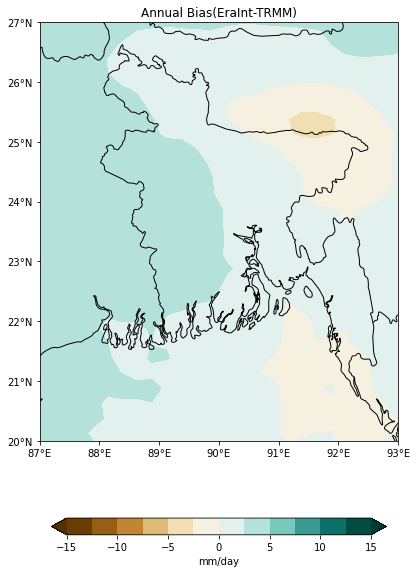

In [21]:
# Plotting annual_pr_mean

#plotting with cartopy
import cartopy.feature as cfeature


fig = plt.figure(figsize=(12,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


m1 = ax.contourf(bias['lon'], bias['lat'],bias[0,0,:,:],
                levels=np.arange(-15,15+1,2.5),  transform = ccrs.PlateCarree(),cmap='BrBG',extend='both')

 
# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)


plt.colorbar(m1, orientation = 'horizontal',shrink=0.5, fraction = 0.04 , label = 'mm/day')
ax.coastlines()
ax.add_feature(cfeature.BORDERS)

plt.title('Annual Bias(EraInt-TRMM)')
plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/Annual Bias(eraint-trmm).png")



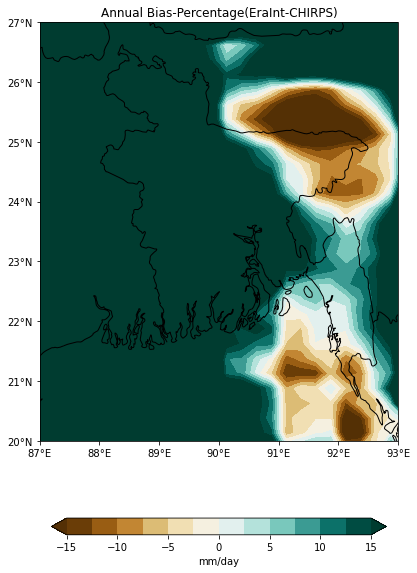

In [23]:
# Plotting bias percentage 

#plotting with cartopy
import cartopy.feature as cfeature


fig = plt.figure(figsize=(12,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


m1 = ax.contourf(bias_percentage['lon'], bias_percentage['lat'],bias_percentage[0,0,:,:],
                levels=np.arange(-15,15+1,2.5),  transform = ccrs.PlateCarree(),cmap='BrBG',extend='both')

 
# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)


plt.colorbar(m1, orientation = 'horizontal',shrink=0.5, fraction = 0.04 , label = 'mm/day')
ax.coastlines()
ax.add_feature(cfeature.BORDERS)


plt.title('Annual Bias-Percentage(EraInt-CHIRPS)')
plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/Annual Bias_percentage(eraint-chirps).png")







In [ ]:
#cma colors
'''Colormap CET_D1A is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, 
BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens,
Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, 
Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy,
RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, 
Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn,
autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, 
copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat,
gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r,
gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma,
magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, 
seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, 
ter'''